In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import datasets

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,10)
pd.set_option('precision', 3)
pd.set_option('display.max_columns',50)

## Read in Data and Inspect

In [95]:
df = datasets.elnino.load_pandas().data
display(df.head())
display(df.info())
display(df.isna().sum())
display(df.describe())

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    61 non-null     float64
 1   JAN     61 non-null     float64
 2   FEB     61 non-null     float64
 3   MAR     61 non-null     float64
 4   APR     61 non-null     float64
 5   MAY     61 non-null     float64
 6   JUN     61 non-null     float64
 7   JUL     61 non-null     float64
 8   AUG     61 non-null     float64
 9   SEP     61 non-null     float64
 10  OCT     61 non-null     float64
 11  NOV     61 non-null     float64
 12  DEC     61 non-null     float64
dtypes: float64(13)
memory usage: 6.3 KB


None

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000
mean,1980.000,24.392,25.839,26.248,25.387,24.162,22.834,21.744,20.843,20.584,20.862,21.524,22.693
std,17.753,0.914,0.801,0.897,1.127,1.324,1.283,1.229,1.139,1.007,1.054,1.094,1.083
min,1950.000,22.980,24.200,24.470,22.970,21.730,20.770,19.520,19.270,18.950,19.110,19.440,21.050
25%,1965.000,23.840,25.360,25.600,24.670,23.290,21.840,21.010,20.030,19.850,20.140,20.770,22.030
50%,1980.000,24.320,25.770,26.090,25.210,23.880,22.540,21.470,20.640,20.500,20.620,21.490,22.500
75%,1995.000,24.710,26.270,26.890,25.840,24.750,23.280,22.310,21.390,21.230,21.640,22.170,23.210
max,2010.000,28.120,28.820,29.240,28.820,28.370,27.430,25.730,24.950,24.690,24.640,25.850,27.080


### Reshape data to observations my month and year

In [96]:
data = pd.DataFrame(index = range(0,61*12), columns = ['ds','y'])
data['ds'] = pd.date_range('1950-01-01','2010-12-01',freq='MS').strftime('%Y-%m-%d')
data['deg C'] = df[df.columns[1:]].values.flatten()
data['y'] = data['deg C'].apply(lambda x: x*9/5.+32.)
data.head()

,ds,y,deg C
0,1950-01-01,73.598,23.11
1,1950-02-01,75.560,24.20
2,1950-03-01,77.666,25.37
3,1950-04-01,74.948,23.86
4,1950-05-01,73.454,23.03


### Observe Trend of Temperatures

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\jfell\AppData\Local\Temp/ipykernel_7948/2510919215.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  _=plt.xticks([])


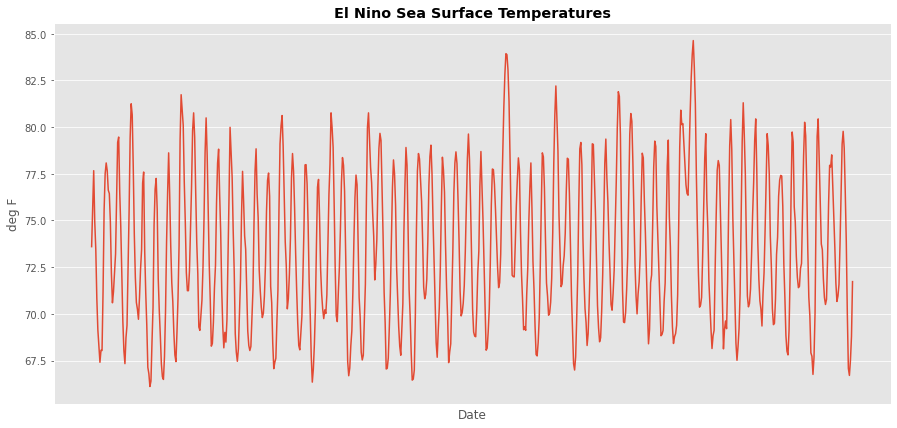

In [97]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(data=data, x='ds',y='y')
plt.title('El Nino Sea Surface Temperatures', fontweight='bold')
plt.ylabel('deg F')
plt.xlabel('Date')
_=plt.xticks([])

## Separate Test and Validation Datasets

In [98]:
train_df = data[['ds','y']].loc[data.index[0:732-24]]
valid_df = data[['ds','y']].loc[708:]
print(f'Training Set Range {train_df.ds.min()} to {train_df.ds.max()}')
print(f'Validation Set Range {valid_df.ds.min()} to {valid_df.ds.max()}')
print('\nTraining Set')
display(train_df.head())
print('\nValidation Set')
display(valid_df.head())

Training Set Range 1950-01-01 to 2008-12-01
Validation Set Range 2009-01-01 to 2010-12-01

Training Set


,ds,y
0,1950-01-01,73.598
1,1950-02-01,75.560
2,1950-03-01,77.666
3,1950-04-01,74.948
4,1950-05-01,73.454



Validation Set


,ds,y
708,2009-01-01,75.902
709,2009-02-01,77.954
710,2009-03-01,77.864
711,2009-04-01,78.512
712,2009-05-01,76.910


## Train Prophet Model

In [99]:
from prophet import Prophet

In [100]:
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [101]:
future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,72.751,72.803,77.674,72.751,72.751,2.405,2.405,2.405,2.405,2.405,2.405,0.0,0.0,0.0,75.155
1,1950-02-01,72.752,75.341,80.234,72.752,72.752,5.065,5.065,5.065,5.065,5.065,5.065,0.0,0.0,0.0,77.817
2,1950-03-01,72.753,76.246,81.056,72.753,72.753,5.821,5.821,5.821,5.821,5.821,5.821,0.0,0.0,0.0,78.575
3,1950-04-01,72.755,74.493,79.368,72.755,72.755,4.167,4.167,4.167,4.167,4.167,4.167,0.0,0.0,0.0,76.922
4,1950-05-01,72.756,72.485,77.502,72.756,72.756,1.980,1.980,1.980,1.980,1.980,1.980,0.0,0.0,0.0,74.736


In [102]:
valid_df.ds = pd.to_datetime(valid_df.ds)
result_df = pd.merge(valid_df,forecast[['ds','yhat','yhat_lower','yhat_upper']], on='ds',how='inner')

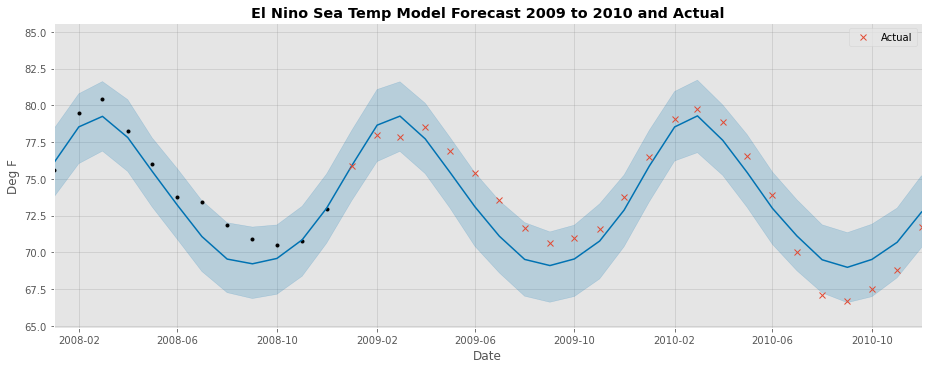

In [104]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast,figsize=(13,5))
ax = fig.gca()
ax.plot(result_df.ds,result_df.y,'x',label = 'Actual')
ax.set_xlim(pd.to_datetime(['2008-01-01','2010-12-01']))
ax.legend(loc='best')
ax.set_title('El Nino Sea Temp Model Forecast 2009 to 2010 and Actual',
         fontweight='bold')
ax.set_ylabel('Deg F')
_=ax.set_xlabel('Date')

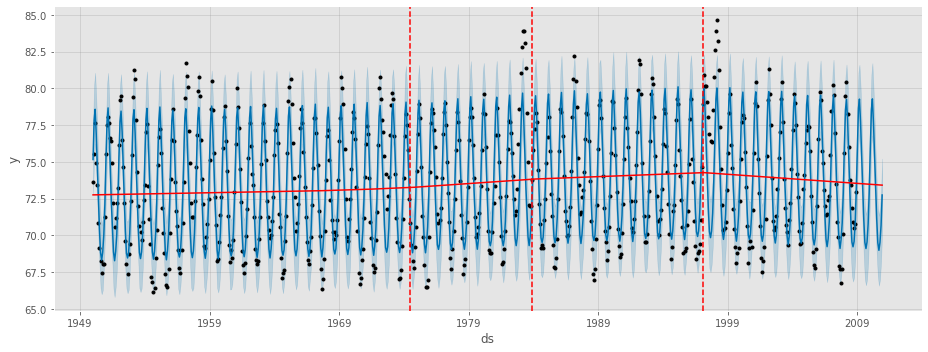

In [105]:
fig = model.plot(forecast,figsize=(13,5))
ax = fig.gca()
#ax.plot(result_df.ds,result_df.y,'x',label = 'Actual')
a = add_changepoints_to_plot(ax, model, forecast)

## SARIMA Model


In [106]:
# SARIMAX Imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

,y
ds,
1950-01-01,73.598
1950-02-01,75.560
1950-03-01,77.666
1950-04-01,74.948
1950-05-01,73.454


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 1950-01-01 to 2010-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       732 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


None

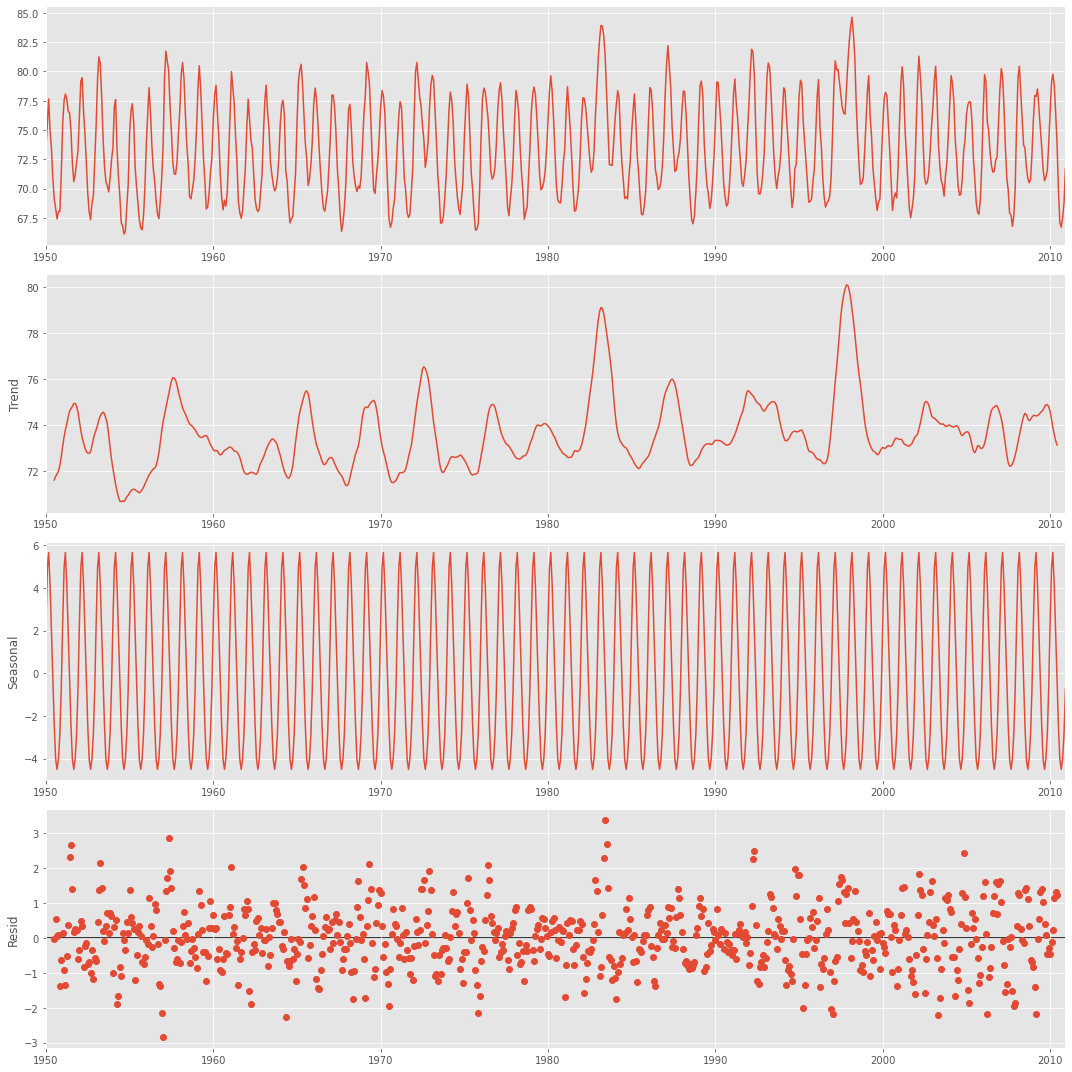

In [107]:
arima_df = data[['ds','y']].copy()
arima_df.ds = pd.to_datetime(arima_df.ds)
arima_df.set_index('ds',inplace=True)
arima_df = arima_df.asfreq('MS')
display(arima_df.head())
display(arima_df.info())
res = seasonal_decompose(arima_df,model='add')
plt.rc('figure',figsize=(15,15))
_=res.plot()

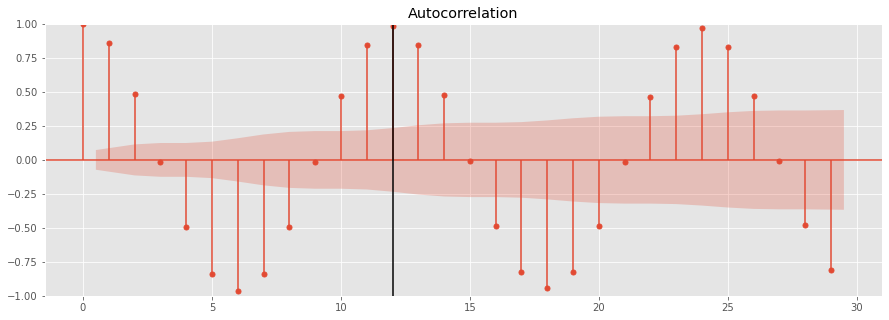

In [108]:
plt.rc('figure',figsize=(15,5))
_=plot_acf(res.seasonal)
_= plt.axvline(12,c='k')

In [109]:
res = auto_arima(arima_df,seasonal=True, m = 12, trace=True)
res.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=7.22 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4125.378, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2237.449, Time=4.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3059.611, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8374.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3082.836, Time=0.22 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=43.68 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.29 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2714.287, Time=0.96 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=11.72 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=3516.078, Time=2.05 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=20.18 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=2222.268, Time=5.47 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2650.322, Time=0.85 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  732
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 12)   Log Likelihood               -1048.989
Date:                             Tue, 07 Dec 2021   AIC                           2109.978
Time:                                     18:49:09   BIC                           2137.552
Sample:                                          0   HQIC                          2120.615
                                             - 732                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0040      0.036      0.112      0.911      -0.067       0.075
ar.L1          0.9046      0.017     52.635      0.000       0.871       0.938
ma.L1          0.1627      0.038      4.242      0.000       0.088       0.238
ar.S.L12       0.5213      0.032     16.480      0.000       0.459       0.583
ar.S.L24       0.4782      0.032     15.110      0.000       0.416       0.540
sigma2         0.9197      0.043     21.454      0.000       0.836       1.004
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 9.15
Prob(Q):                              0.32   Prob(JB):                         0.01
Heteroskedasticity (H):               1.02   Skew:                             0.03
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train SARIMA Model
Best model:  ARIMA(1,0,1)(2,0,0)[12] intercept


In [110]:
atrain_df = arima_df.loc[arima_df.index[0:732-24]]
avalid_df = arima_df.iloc[708:]

In [111]:
amod = SARIMAX(atrain_df,order=(1,0,1),
              seasonal_order=(2,0,0,12),
              )
res = amod.fit()
res.summary()

C:\Users\jfell\anaconda3\envs\Prophet\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  708
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 12)   Log Likelihood               -1040.223
Date:                             Tue, 07 Dec 2021   AIC                           2090.445
Time:                                     18:49:15   BIC                           2113.257
Sample:                                 01-01-1950   HQIC                          2099.259
                                      - 12-01-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.001   1270.577      0.000       0.998       1.001
ma.L1          0.1357      0.024      5.616      0.000       0.088       0.183
ar.S.L12       0.4969      0.032     15.451      0.000       0.434       0.560
ar.S.L24       0.5028      0.032     15.631      0.000       0.440       0.566
sigma2         0.9558      0.046     20.768      0.000       0.866       1.046
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 5.12
Prob(Q):                              0.79   Prob(JB):                         0.08
Heteroskedasticity (H):               0.98   Skew:                            -0.07
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

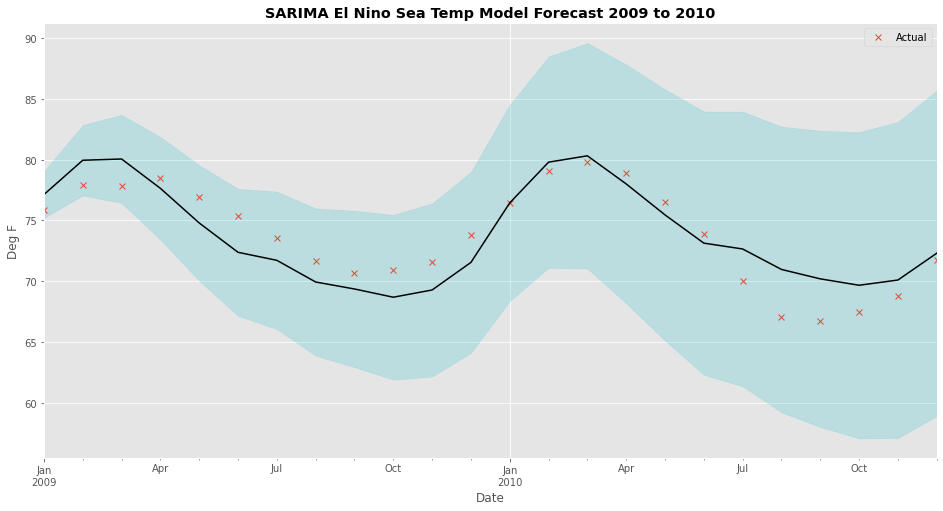

In [112]:
# Get Prediction
start = len(atrain_df)
end = len(atrain_df) + len(avalid_df) - 1
prediction = res.get_prediction(start, end)
avalid_df = avalid_df.rename(columns={'y':'Actual'})


ares_df = prediction.conf_int(alpha=0.05)
ares_df['yhat'] = prediction.predicted_mean
ares_df = ares_df.rename(columns={'lower y':'yhat_lower','upper y':'yhat_upper'})



ax = avalid_df.plot(legend=True, figsize=(16,8),marker='x',linestyle='None')
ax.fill_between(ares_df.index, ares_df.yhat_lower, ares_df.yhat_upper,
                color='tab:cyan',alpha=0.2)
ares_df['yhat'].plot(color='k')

plt.title("SARIMA El Nino Sea Temp Model Forecast 2009 to 2010",
         fontweight='bold')
plt.ylabel('Deg F')
_=plt.xlabel('Date')

## Compare Models

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import sqrt


result_df = result_df.rename(columns={'yhat':'Prophet_Pred','y':'Actual'})
result_df['SARIMA_Pred'] = ares_df.yhat.values
print(f'Prophet RMSE {sqrt(mean_squared_error(result_df.Prophet_Pred,result_df.Actual))}')
print(f'Prophet MAE {mean_absolute_error(result_df.Prophet_Pred,result_df.Actual)}')
print(f'SARIMA RMSE {sqrt(mean_squared_error(result_df.SARIMA_Pred,result_df.Actual))}')
print(f'SARIMA MAE {mean_absolute_error(result_df.SARIMA_Pred,result_df.Actual)}')

Prophet RMSE 1.4746453237907395
Prophet MAE 1.3122055587123658
SARIMA RMSE 1.959624754120043
SARIMA MAE 1.7108545070088734
